# Assignment 2

**Data sets to use: WestRoxbury_housing.csv**

* Possible points: 100

* Rename the .ipynb notebook as Assignment_2_{FirstName}_{LastName}.ipynb before submitting your notebook. Eg. Assignment_2_Vijay_Koju.ipynb

* Due Date: 04/07/2023 11:59pm

* Submit the .ipynb notebook only. There is no need to submit the data file and any other write up. All your code, and answers should be included in the notebook.

##### Include the following information:

* Name: Sai Pranay Reddy Aare
* UTD ID: sxa220072
* Email: sxa220072@utdallas.edu

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer


### 1) Import the data.

In [28]:
df = pd.read_csv('WestRoxbury_housing.csv')

### 2) Check if there are any missing values in any of the columns.

In [29]:
df.isna().sum()

TOTAL VALUE      0
LOT SQFT       118
YR BUILT        63
GROSS AREA       0
LIVING AREA      0
FLOORS           0
ROOMS            0
BEDROOMS         0
FULL BATH        0
HALF BATH        0
KITCHEN          0
FIREPLACE        0
REMODEL         34
dtype: int64

### 3) Replace the missing values with median for numeric columns and mode for categorical column.

In [30]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['TOTAL VALUE',
 'LOT SQFT',
 'YR BUILT',
 'GROSS AREA',
 'LIVING AREA',
 'FLOORS',
 'ROOMS',
 'BEDROOMS',
 'FULL BATH',
 'HALF BATH',
 'KITCHEN',
 'FIREPLACE']

In [31]:
Categorical_columns = df.columns[df.dtypes == "object"].tolist()
Categorical_columns

['REMODEL']

In [32]:
medianFiller = lambda x: x.fillna(x.median())
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [33]:
modeFiller = lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
df[Categorical_columns] = df[Categorical_columns].apply(modeFiller, axis=0)

In [34]:
df.isnull().sum()

TOTAL VALUE    0
LOT SQFT       0
YR BUILT       0
GROSS AREA     0
LIVING AREA    0
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL BATH      0
HALF BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

### 4) Remove the duplicate rows (if any) from the datafame.

In [35]:
df=df.drop_duplicates()

### 5) Check the 'YR BUILT' column and see if there is any abnormal value(s). If yes, treat them appropriately.

In [36]:
current_year = pd.Timestamp.now().year
median_year = df['YR BUILT'].median()
df.loc[df['YR BUILT'] < 1800, 'YR BUILT'] = median_year
df.loc[df['YR BUILT'] > current_year, 'YR BUILT'] = median_year
df

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938.0,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950.0,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987.0,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946.0,2000,1000,1.0,5,2,1,0,1,0,None


### 6) Perform exploratory data analysis (EDA): Univariate & Bivariate

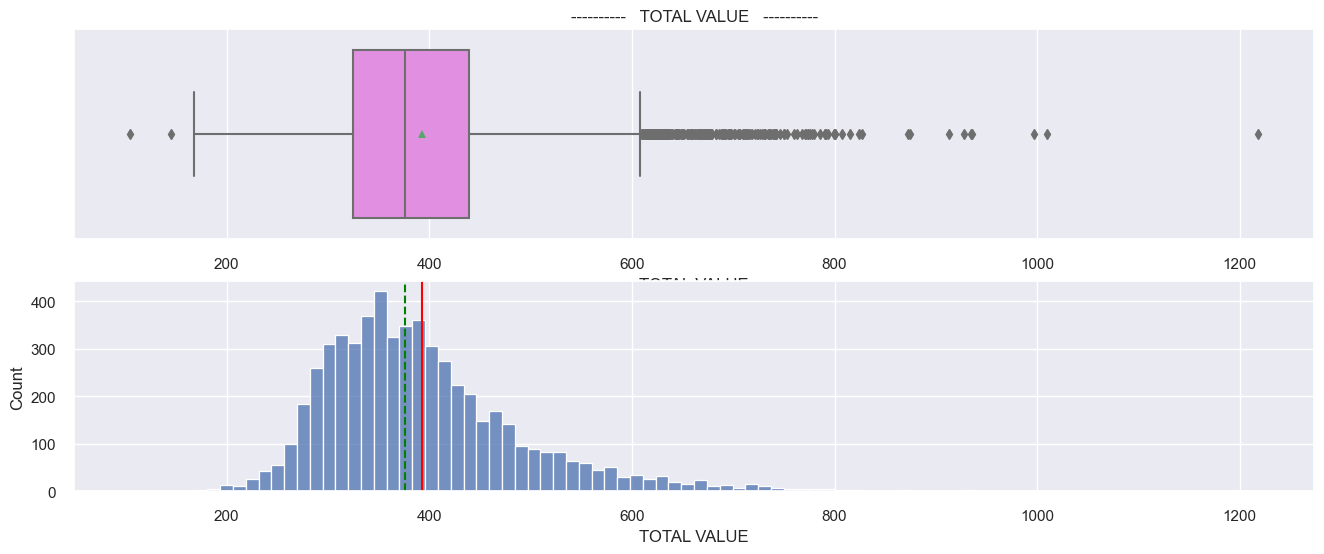

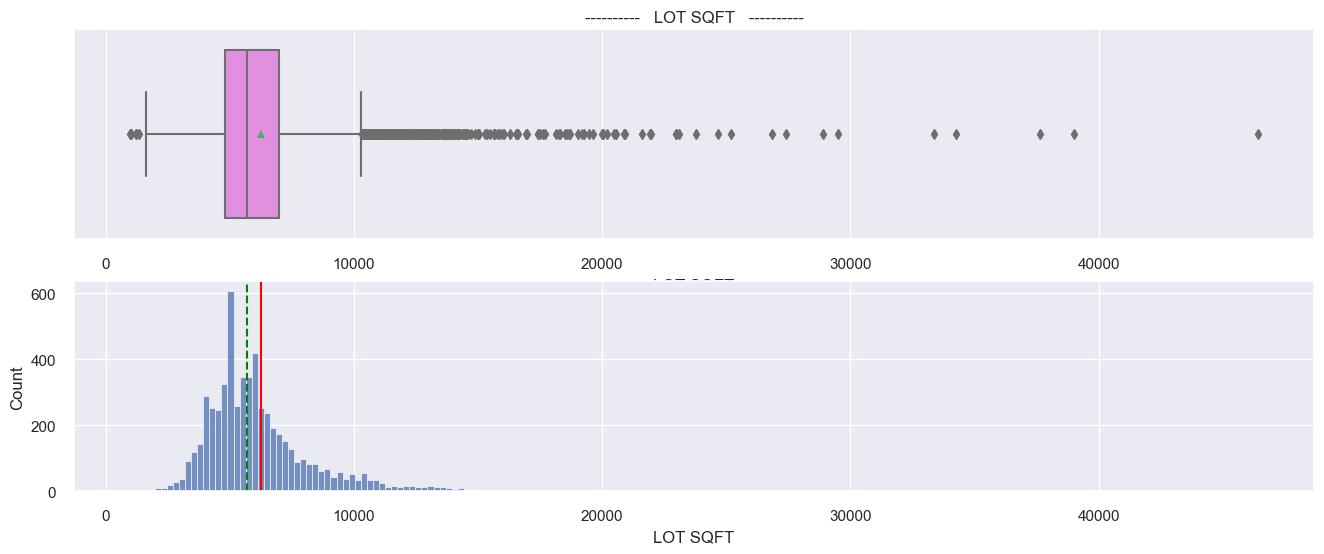

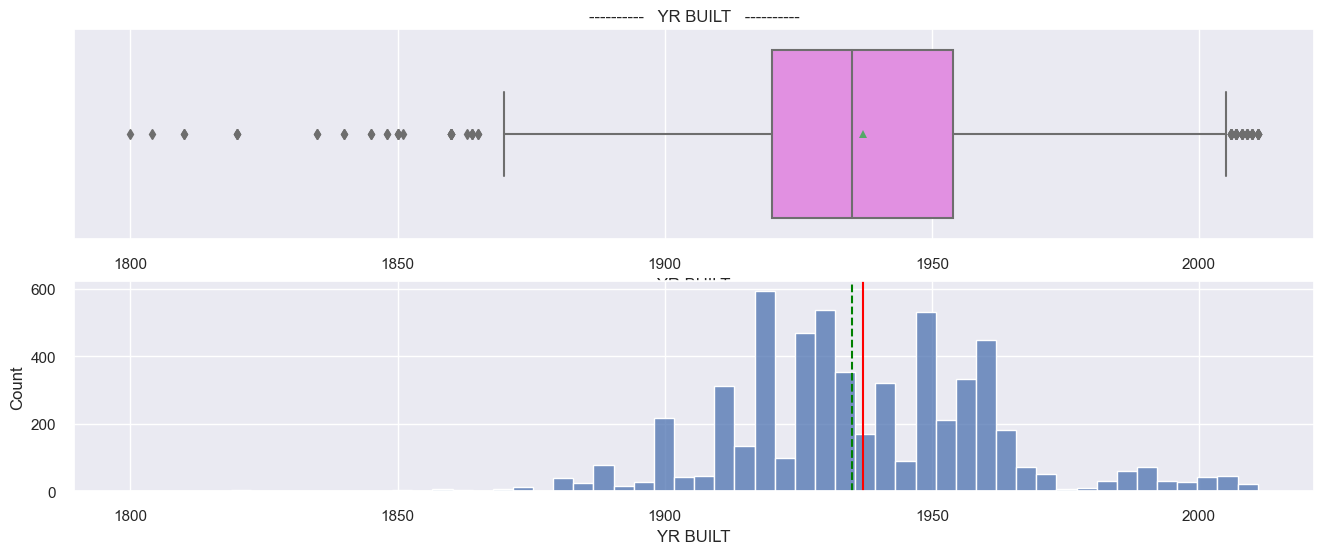

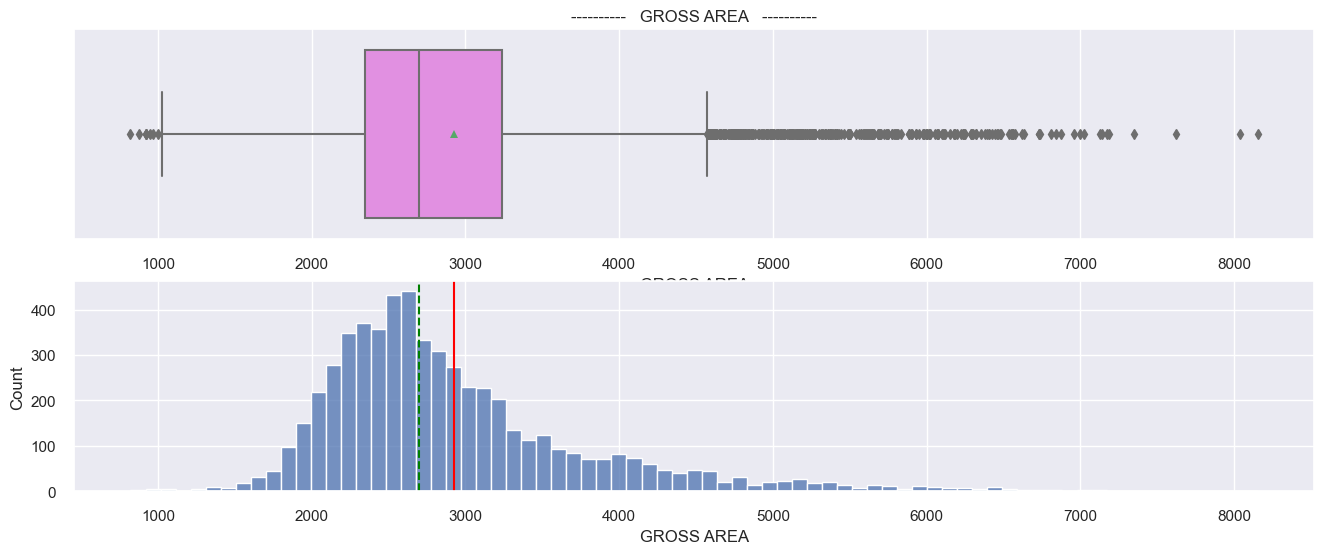

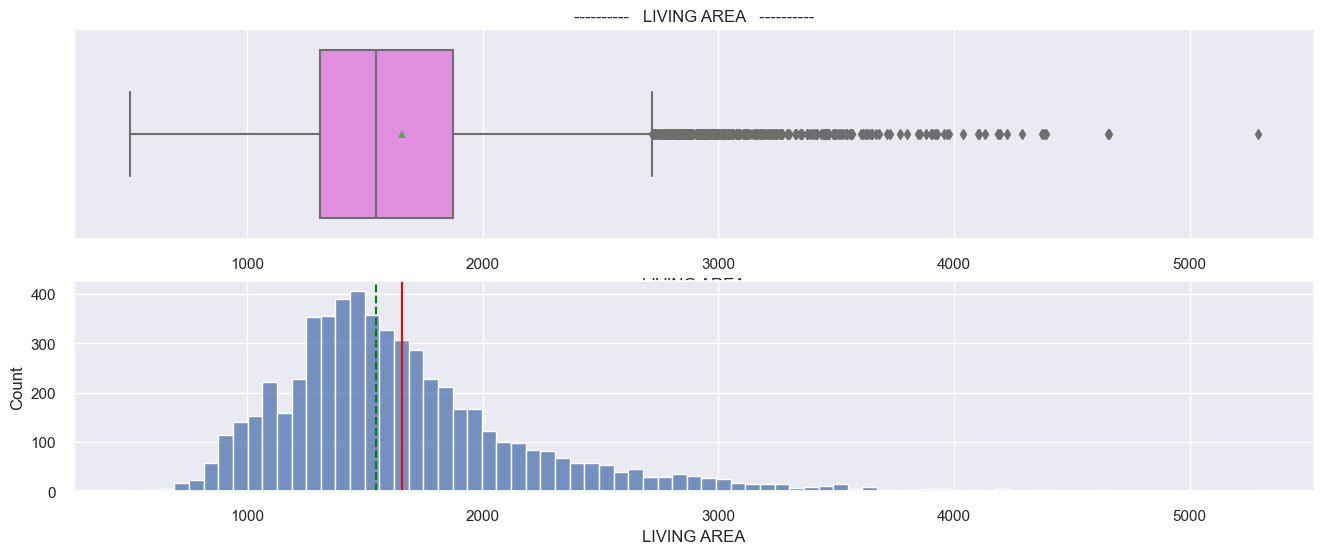

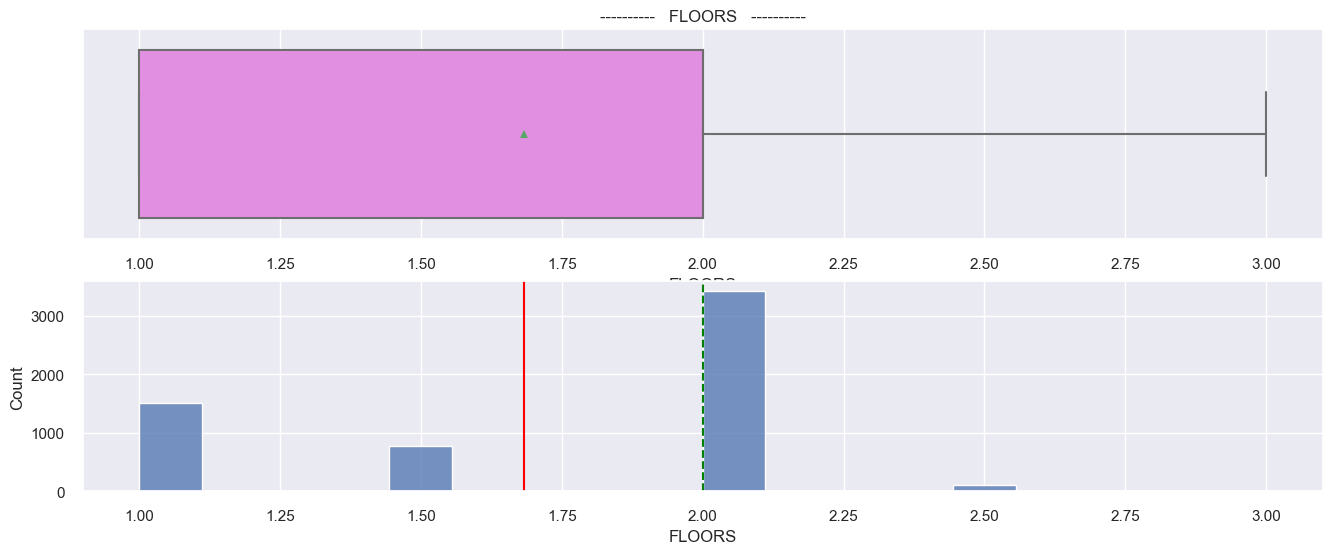

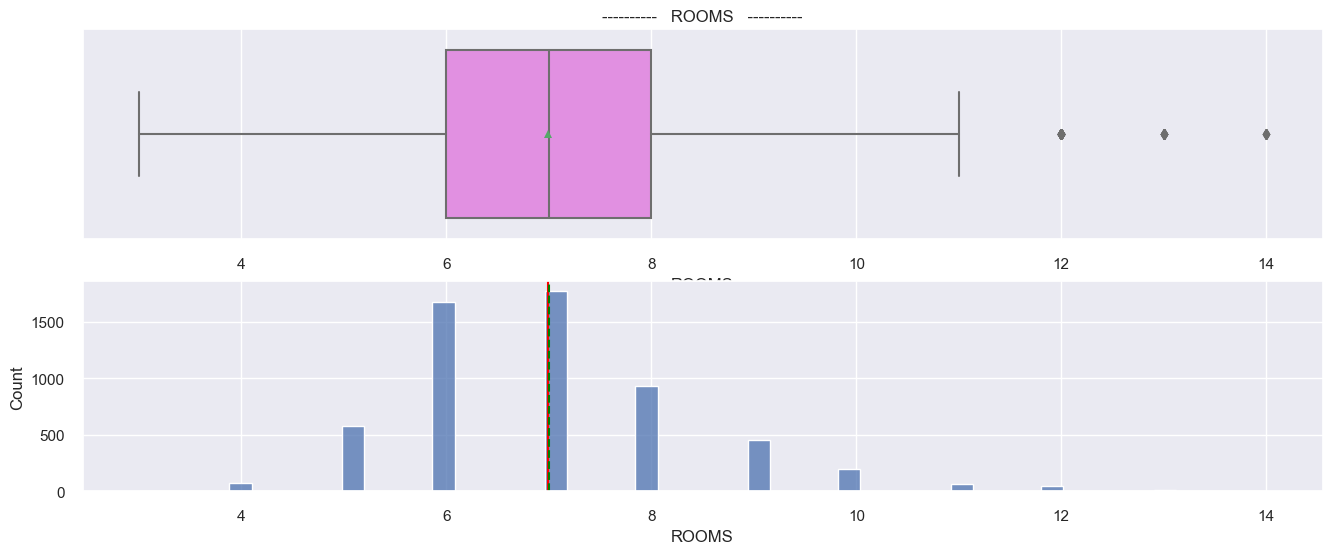

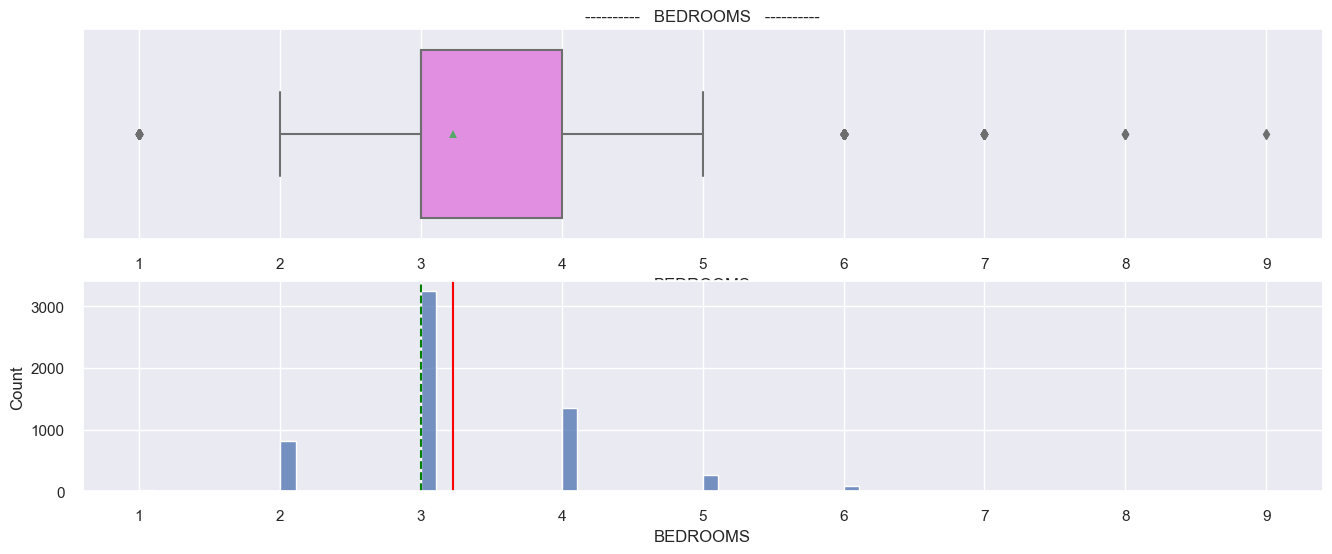

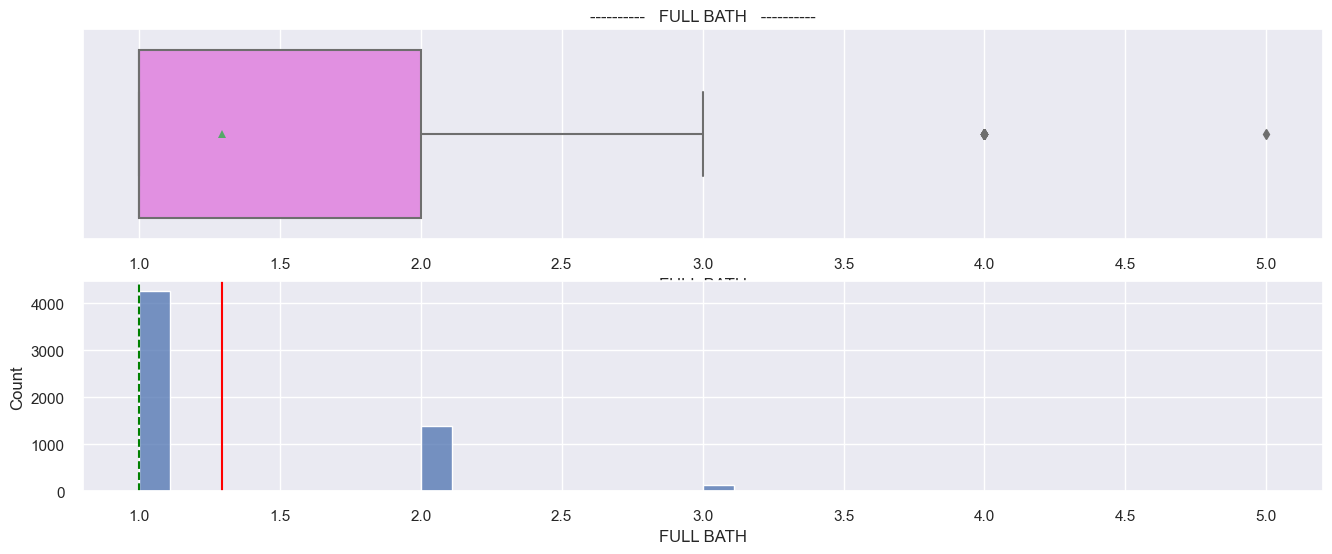

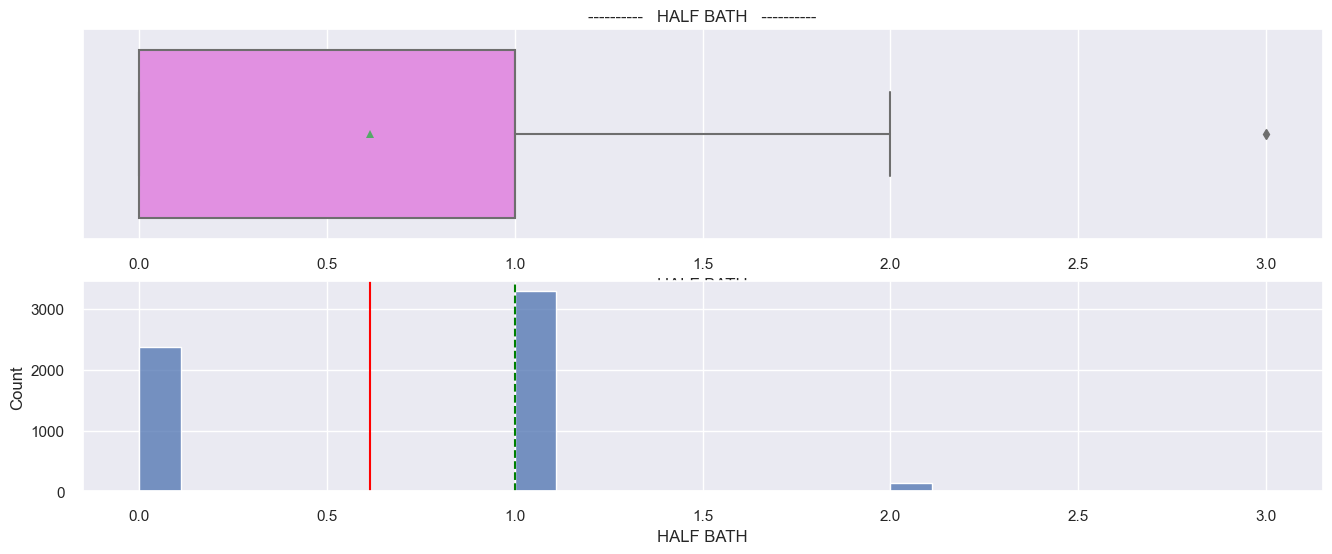

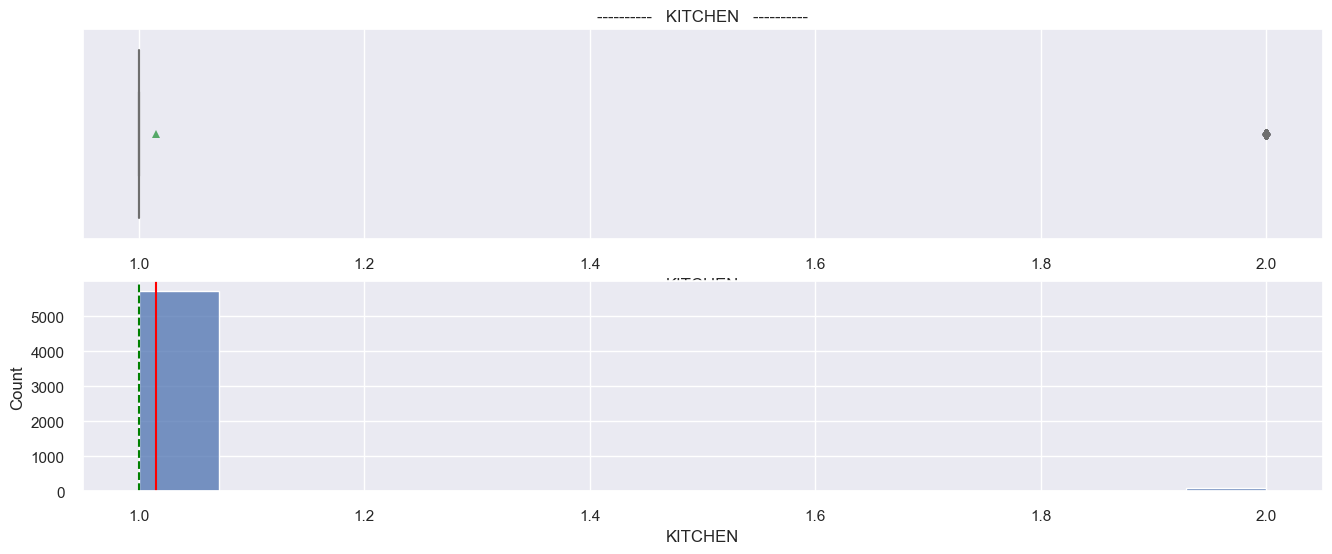

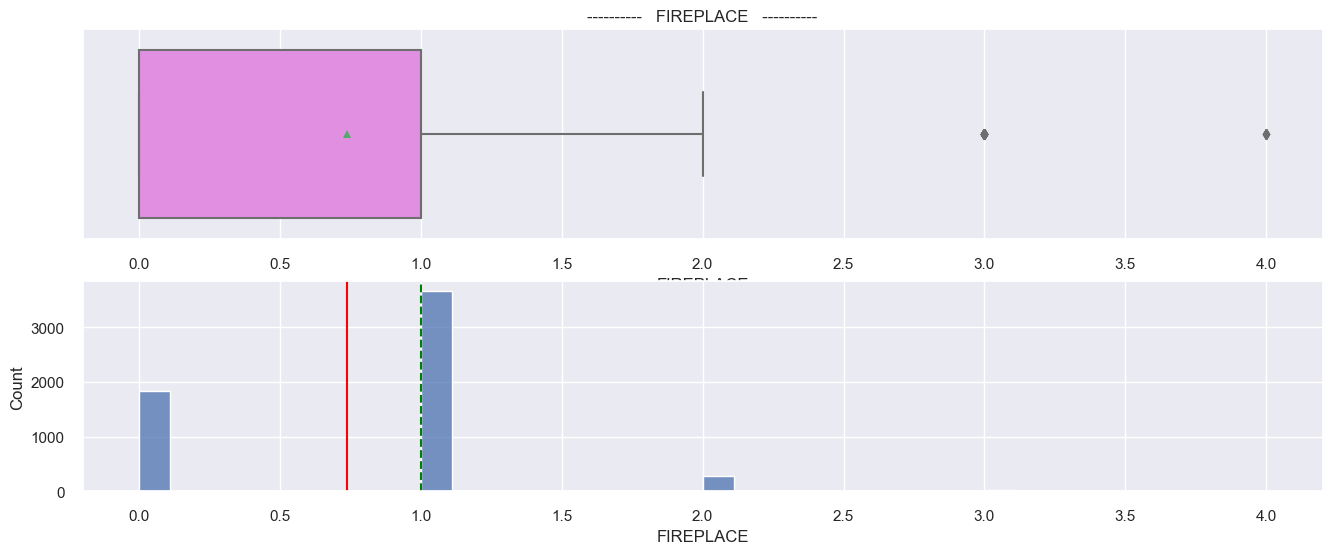

In [37]:
#Univariate analysis
for col in numeric_columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=df, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=df, x=col)
    plt.axvline(df[col].mean(), color="red", linestyle="-")
    plt.axvline(df[col].median(), color="green", linestyle="--")
    plt.show()

In [38]:
#Bivariate analysis
df[numeric_columns].corr()["TOTAL VALUE"]

TOTAL VALUE    1.000000
LOT SQFT       0.541636
YR BUILT      -0.120628
GROSS AREA     0.800356
LIVING AREA    0.836937
FLOORS         0.481353
ROOMS          0.639013
BEDROOMS       0.561638
FULL BATH      0.431643
HALF BATH      0.347456
KITCHEN        0.018412
FIREPLACE      0.357930
Name: TOTAL VALUE, dtype: float64

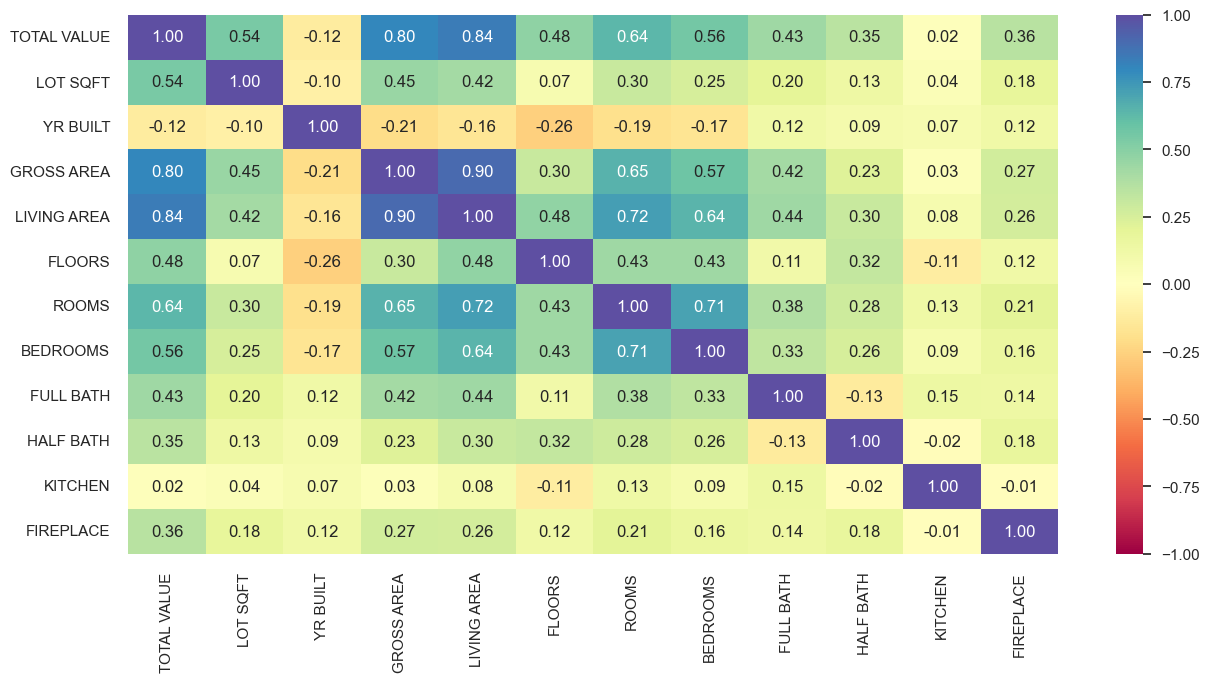

In [39]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

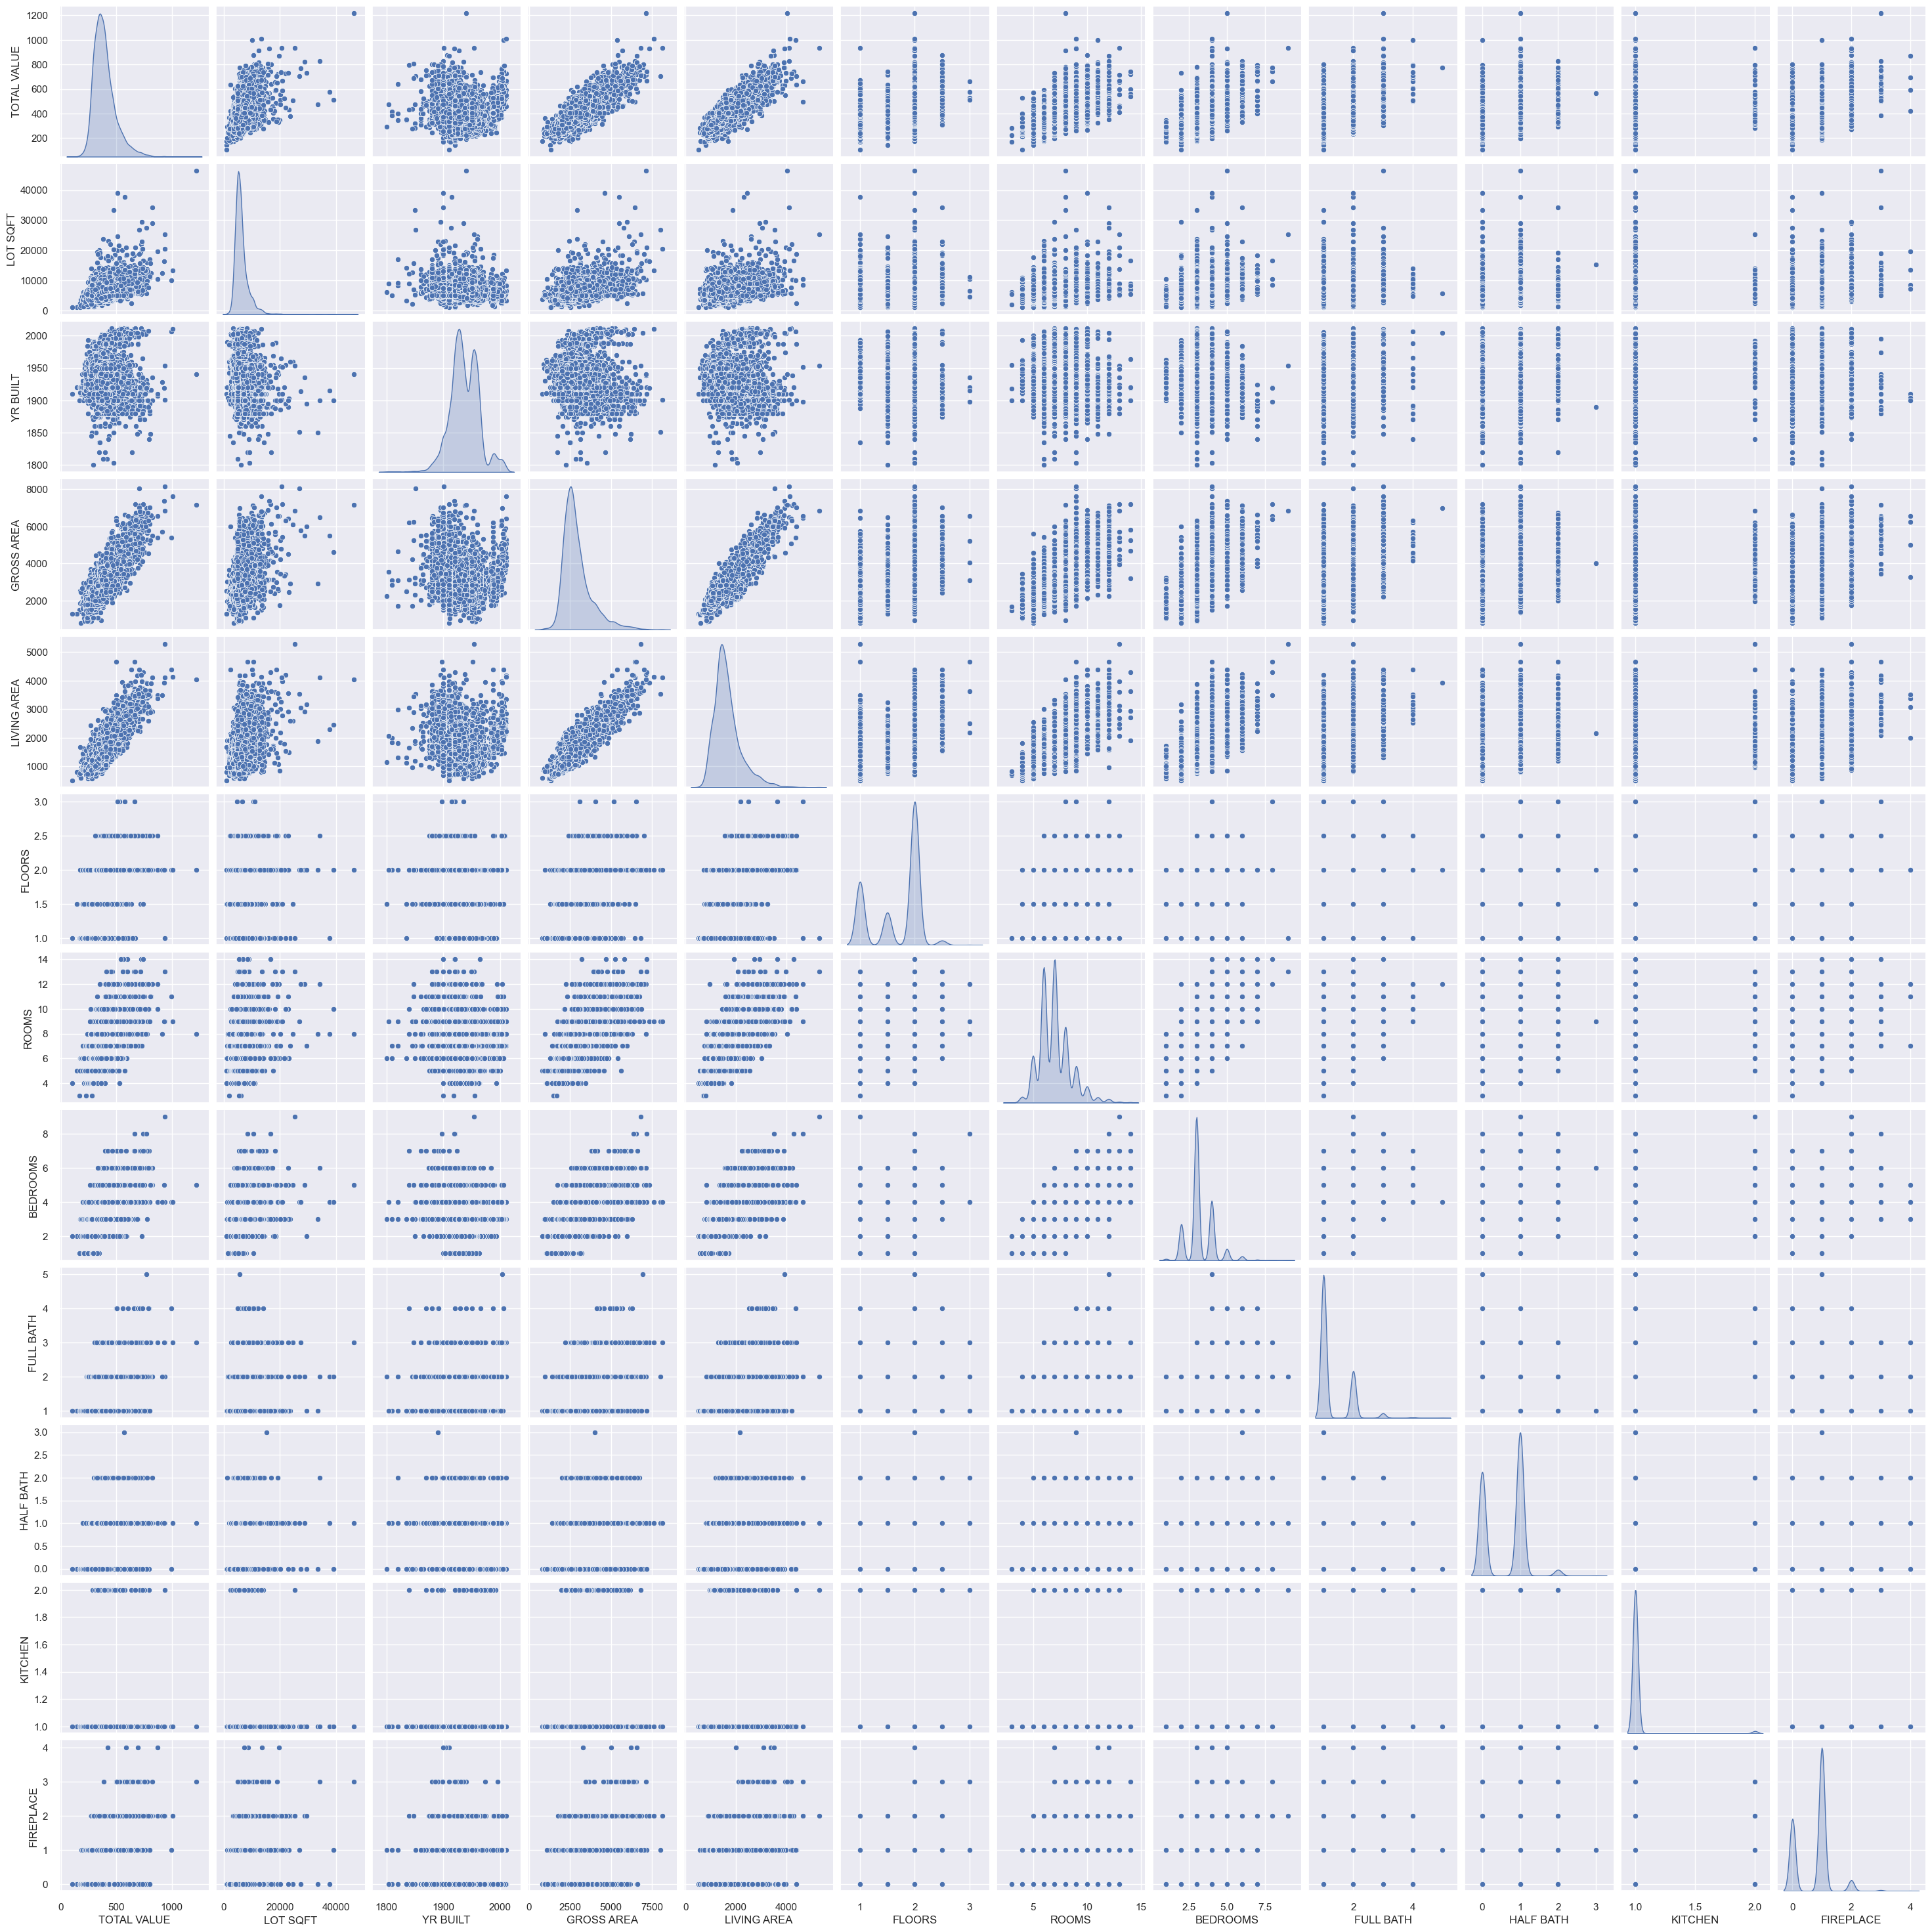

In [40]:
sns.pairplot(data=df[numeric_columns], diag_kind="kde")
plt.show()

### 7) Split the data into a training (70%) and a testing (30%) datasets. Use the training dataset to train a Linear Regression model to explain/predict the 'TOTAL VALUE' of houses using all the available features. Evaluate the performance of the model on both the training and the test dataset using R-squared.

In [41]:
X = df.drop(["TOTAL VALUE"], axis=1)
y = df["TOTAL VALUE"]

In [42]:
X = sm.add_constant(X)
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.0,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,0,0
1,1.0,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,0,1
2,1.0,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,0,0
3,1.0,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,0,0
4,1.0,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4059
Number of rows in test data = 1740


In [46]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse,"MAE": mae,"R-squared": r2,"Adj. R-squared": adjr2,"MAPE": mape,},index=[0],)

    return df_perf

In [47]:
st_lin_reg = sm.OLS(y_train, X_train).fit()
print(st_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL VALUE   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1344.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:41:28   Log-Likelihood:                -20967.
No. Observations:                4059   AIC:                         4.196e+04
Df Residuals:                    4045   BIC:                         4.205e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -163.8488     62.054     -2.

In [48]:
# checking model performance on train set (seen 70% data)
print("Training Performance")
st_lin_reg_train_perf = model_performance_regression(st_lin_reg, X_train, y_train)
display(st_lin_reg_train_perf)

# checking model performance on test set (seen 30% data)
print("Test Performance")
st_lin_reg_test_perf = model_performance_regression(st_lin_reg, X_test, y_test)
display(st_lin_reg_test_perf)

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,42.378297,32.267564,0.811991,0.81134,8.453967


Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,43.944663,32.621171,0.814939,0.813437,8.415001


### 8) Interprete the R-squared value for your model.

For the training dataset,the R-squared value is high, a high R-squared value indicates that the model is able to explain a large proportion of the variability in the dependent variable using the independent variables, which is a good sign that the model is a good fit for the data
For the testing dataset, a high R-squared value indicates that the model can generalize well to new, unseen data, which is a desirable quality for a model.

### 9) Provide the interpretation of any three model coefficients.

Interpreting the model coefficients
LOT SQFT: 0.0086
Everything else remaining the same, an increase in LOT SQFT by one SQ.FT is associated with an increase in TOTAL VALUE in average by 0.0086 thousands of USD.
YR BUILT: 0.1072
Everything else remaining the same, an increase in Year the property was built by one YEAR is associated with an increase in TOTAL VALUE in average by 0.1072 thousands of USD.
GROSS AREA: 0.0340
Everything else remaining the same, an increase in GROSS AREA by one SQ.FT is associated with an increase in TOTAL VALUE in average by 0.0340 thousands of USD.

### 10) Use KMeans clustering as a feature engineering technique to create a new feature (information about clusters) that can be included in your Linear regression model. Only use the features 'LOT SQFT' and 'YR BUILT' for your KMeans clustering analysis. 

In [49]:
num_col=['LOT SQFT','YR BUILT']

In [50]:
scaler = MinMaxScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

For n_clusters = 2, WCSS: = 51.64987962068604, Silhouette score: 0.48033673798982157)
For n_clusters = 3, WCSS: = 37.672542765502044, Silhouette score: 0.449397562945518)
For n_clusters = 4, WCSS: = 28.05058388410327, Silhouette score: 0.46929961271154075)
For n_clusters = 5, WCSS: = 22.723935723297988, Silhouette score: 0.4765051072907543)
For n_clusters = 6, WCSS: = 19.52710224227949, Silhouette score: 0.39835513587104016)
For n_clusters = 7, WCSS: = 16.934591524476627, Silhouette score: 0.42457623309951914)
For n_clusters = 8, WCSS: = 14.624614490650332, Silhouette score: 0.4289280057019231)
For n_clusters = 9, WCSS: = 13.055014829939973, Silhouette score: 0.4011625003869637)


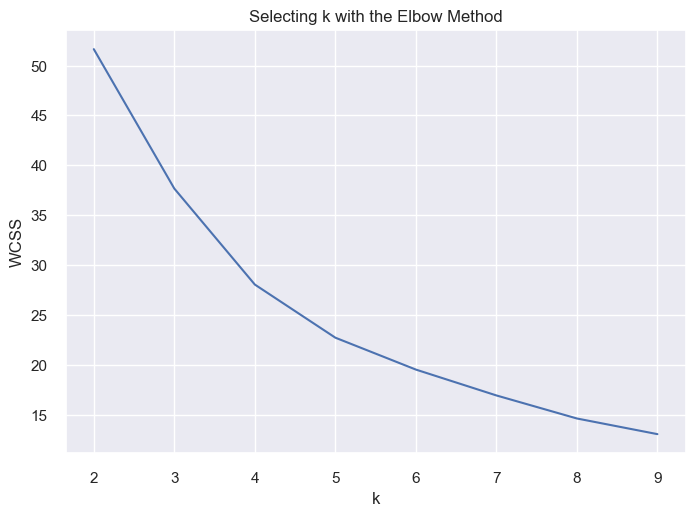

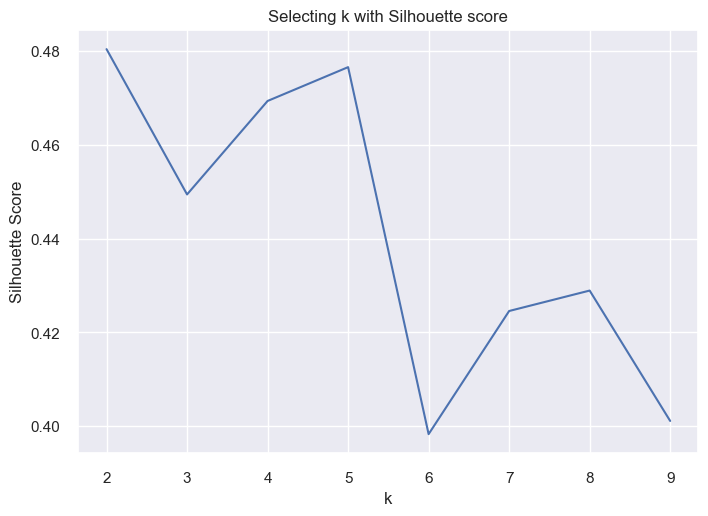

In [51]:
clusters = range(2, 10)
elbow = []
sil_score = []

# perform k-means clustering for different values of k
for k in clusters:
    model = KMeans(n_clusters=k, init = 'k-means++', random_state = 42).fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)

    # within cluster sum of squared distances between each member of the cluster and its centroid
    wcss = model.inertia_
    elbow.append(wcss)
    
    # Silhouette score
    score = silhouette_score(subset_scaled_df, prediction)
    sil_score.append(score)
    print("For n_clusters = {}, WCSS: = {}, Silhouette score: {})".format(k, wcss, score))

plt.plot(clusters, elbow, "bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method")
plt.show()

plt.plot(clusters, sil_score)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Selecting k with Silhouette score")
plt.show()

#### 10.1) Identify the appropriate number of clusters using the Silhouette score method.

From the Silhouette score Plot K=2 has highest Silhoutte score. The number of clusters are 2

#### 10.2) Use the optimal # of clusters you identified above to perform KMeans clustering analysis using 'LOT SQFT' and 'YR BUILT' features on the entire dataset. Assign the clustering result as a new column in your original dataset. 

In [54]:
df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

#### 10.3) Visualize the clusters.

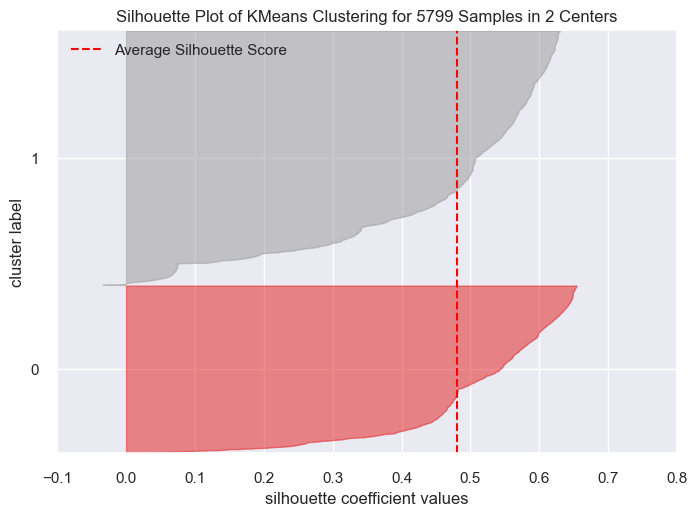

KMeans(n_clusters=2, random_state=42)

In [53]:
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, init = 'k-means++', random_state = 42)
# visualizing the silhouette score
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(subset_scaled_df)
visualizer.show()

kmeans.fit(subset_scaled_df)

#### 10.4) Re-train/evaluate your Linear regression model using the new dataset that includes an additional feature (cluster assignments). 

In [56]:
X = df.drop(["TOTAL VALUE"], axis=1)
y = df["TOTAL VALUE"]

In [57]:
X = sm.add_constant(X)
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,K_means_segments,REMODEL_Old,REMODEL_Recent
0,1.0,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,1,0,0
1,1.0,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,0,0,1
2,1.0,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,1,0,0
3,1.0,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,0,0,0
4,1.0,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,1,0,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4059
Number of rows in test data = 1740


In [59]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse,"MAE": mae,"R-squared": r2,"Adj. R-squared": adjr2,"MAPE": mape,},index=[0],)

    return df_perf

In [60]:
st_lin_reg = sm.OLS(y_train, X_train).fit()
print(st_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL VALUE   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1304.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:21   Log-Likelihood:                -20894.
No. Observations:                4059   AIC:                         4.182e+04
Df Residuals:                    4044   BIC:                         4.191e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -923.1914     87.086  

In [61]:
print("Training Performance")
st_lin_reg_train_perf = model_performance_regression(st_lin_reg, X_train, y_train)
display(st_lin_reg_train_perf)

# checking model performance on test set (seen 30% data)
print("Test Performance")
st_lin_reg_test_perf = model_performance_regression(st_lin_reg, X_test, y_test)
display(st_lin_reg_test_perf)

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,41.618415,31.520608,0.818673,0.818,8.246484


Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,43.622795,32.237905,0.81764,0.816053,8.33193


#### 10.5) Is this model better than your previous model?

In [ ]:
The model with clusters is better than the model without clusters. Because the R-squared value is higher for this model than pervious model